## Sentence Transformers

Jay Urbain, PhD

References:  
Reimers, Nils and Gurevych, Iryna. Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks", Association for Computational Linguistics, 11/2019.  
http://arxiv.org/abs/1908.10084 
    
Github:   
- https://github.com/UKPLab/sentence-transformers

#### Installation

Install the model with pip:

pip install -U sentence-transformers


From source

Clone this repository (https://github.com/UKPLab/sentence-transformers.git) and install it with pip:

pip install -e .

In [3]:
!ls

Semantic Similarity with TF-Hub Universal Encoder - Colaboratory.pdf
Semantic_Similarity_with_TF_Hub_Universal_Encoder.ipynb
Sentence_Transformers.ipynb
Similarity_Measures_for_Text_Document_Cl.pdf
Word Mover’s Embedding-From Word2Vec to Document Embedding.pdf
gensim_wmd.ipynb
run_distance_metrics.ipynb
sentence-transformers
spacy_wmd.ipynb
sphx_glr_run_wmd_001.png
transformers
universal-sentence-encoder-fine-tune
wmd-obama.png
wmd_metric.pdf


In [5]:
%cd /Users/jayurbain/Dropbox/DeepQuestions/sentence-transformers

/Users/jayurbain/Dropbox/DeepQuestions/sentence-transformers


In [6]:
!python examples/datasets/get_data.py

Beginning download of datasets
Download AllNLI.zip
Extract AllNLI.zip
Download stsbenchmark.zip
Extract stsbenchmark.zip
Download wikipedia-sections-triplets.zip
Extract wikipedia-sections-triplets.zip
All datasets downloaded and extracted


## Semantic Search

Application for sentence embeddings for semantic search.

For a given query sentence,
find the most similar sentence in a corpus.

Output the top 5 most similar sentences in the corpus for a query.

In [7]:
from sentence_transformers import SentenceTransformer
import scipy.spatial

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus)

100%|██████████| 405M/405M [01:05<00:00, 6.23MB/s] 


In [15]:
# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']
queries = corpus
query_embeddings = embedder.encode(queries)

In [16]:
# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(corpus[idx].strip(), "(Score: %.4f)" % (1-distance))





Query: A man is eating food.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 1.0000)
A man is eating a piece of bread. (Score: 0.8437)
Two men pushed carts through the woods. (Score: 0.3480)
A monkey is playing drums. (Score: 0.2096)
A man is riding a horse. (Score: 0.1889)




Query: A man is eating a piece of bread.

Top 5 most similar sentences in corpus:
A man is eating a piece of bread. (Score: 1.0000)
A man is eating food. (Score: 0.8437)
A monkey is playing drums. (Score: 0.2860)
Two men pushed carts through the woods. (Score: 0.2797)
A man is riding a white horse on an enclosed ground. (Score: 0.1350)




Query: The girl is carrying a baby.

Top 5 most similar sentences in corpus:
The girl is carrying a baby. (Score: 1.0000)
A woman is playing violin. (Score: 0.4002)
A monkey is playing drums. (Score: 0.2725)
A cheetah is running behind its prey. (Score: 0.2250)
A man is riding a horse. (Score: 0.0978)




Query: A man is riding a horse.

Top 5 most s

## Clustering

k-means clustering using sklearn

In [10]:
from sklearn.cluster import KMeans

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [11]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['A man is eating food.', 'A man is eating a piece of bread.']

Cluster  2
['The girl is carrying a baby.', 'A woman is playing violin.']

Cluster  3
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  4
['A monkey is playing drums.', 'A cheetah is running behind its prey.']

Cluster  5
['Two men pushed carts through the woods.']



Hierarchical Aglomerative Clustering

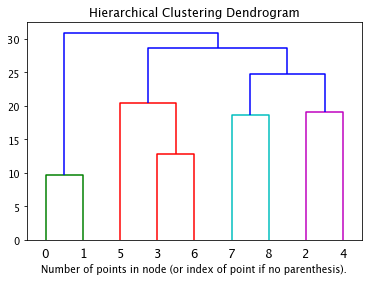

In [14]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(corpus_embeddings)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

#### Load sentences

In [17]:
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]

In [33]:
!pwd

/Users/jayurbain/Dropbox/DeepQuestions/sentence-transformers


In [44]:
with open('sentence.txt', 'w') as f:
    for s in corpus:
        f.write(s +'\n')

In [45]:
!cat sentence.txt

A man is eating food.
A man is eating a piece of bread.
The girl is carrying a baby.
A man is riding a horse.
A woman is playing violin.
Two men pushed carts through the woods.
A man is riding a white horse on an enclosed ground.
A monkey is playing drums.
A cheetah is running behind its prey.


In [47]:
corpus_copy = []
filepath = 'sentence.txt'
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        corpus_copy.append(line)
        print("Line {}: {}".format(cnt, line))
        line = fp.readline()
        cnt += 1

Line 1: A man is eating food.

Line 2: A man is eating a piece of bread.

Line 3: The girl is carrying a baby.

Line 4: A man is riding a horse.

Line 5: A woman is playing violin.

Line 6: Two men pushed carts through the woods.

Line 7: A man is riding a white horse on an enclosed ground.

Line 8: A monkey is playing drums.

Line 9: A cheetah is running behind its prey.



In [48]:
corpus_copy

['A man is eating food.\n',
 'A man is eating a piece of bread.\n',
 'The girl is carrying a baby.\n',
 'A man is riding a horse.\n',
 'A woman is playing violin.\n',
 'Two men pushed carts through the woods.\n',
 'A man is riding a white horse on an enclosed ground.\n',
 'A monkey is playing drums.\n',
 'A cheetah is running behind its prey.\n']

In [49]:
from sentence_transformers import SentenceTransformer
import scipy.spatial

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Corpus with example sentences
# corpus = ['A man is eating food.',
#           'A man is eating a piece of bread.',
#           'The girl is carrying a baby.',
#           'A man is riding a horse.',
#           'A woman is playing violin.',
#           'Two men pushed carts through the woods.',
#           'A man is riding a white horse on an enclosed ground.',
#           'A monkey is playing drums.',
#           'A cheetah is running behind its prey.'
#           ]
corpus = corpus_copy
corpus_embeddings = embedder.encode(corpus)

In [50]:
# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(corpus[idx].strip(), "(Score: %.4f)" % (1-distance))





Query: A man is eating food.

Top 5 most similar sentences in corpus:
A man is eating food. (Score: 1.0000)
A man is eating a piece of bread. (Score: 0.8437)
Two men pushed carts through the woods. (Score: 0.3480)
A monkey is playing drums. (Score: 0.2096)
A man is riding a horse. (Score: 0.1889)




Query: A man is eating a piece of bread.

Top 5 most similar sentences in corpus:
A man is eating a piece of bread. (Score: 1.0000)
A man is eating food. (Score: 0.8437)
A monkey is playing drums. (Score: 0.2860)
Two men pushed carts through the woods. (Score: 0.2797)
A man is riding a white horse on an enclosed ground. (Score: 0.1350)




Query: The girl is carrying a baby.

Top 5 most similar sentences in corpus:
The girl is carrying a baby. (Score: 1.0000)
A woman is playing violin. (Score: 0.4002)
A monkey is playing drums. (Score: 0.2725)
A cheetah is running behind its prey. (Score: 0.2250)
A man is riding a horse. (Score: 0.0978)




Query: A man is riding a horse.

Top 5 most s